In [1]:
#importar libreria 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#creamos el dataframe y eliminamos valores nulos 
df = pd.read_csv("vgsales.csv")
df = df.dropna()


In [12]:
#tramformamos la columna Year a tipo de dato entero ya que trae decimales ejemplo 2009.0
df["Year"] = df["Year"].astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
#¿Cuáles son los años con más ventas totales de videojuegos?
total_sales = df.groupby("Year")["Global_Sales"].sum().reset_index()
total_sales = total_sales.sort_values(by="Global_Sales", ascending=False).head(10)
total_sales = total_sales.sort_values(by="Year", ascending=True)
total_sales

,Year,Global_Sales
22,2002,395.52
24,2004,414.01
25,2005,458.51
26,2006,521.04
27,2007,609.92
28,2008,678.90
29,2009,667.30
30,2010,600.29
31,2011,515.80
33,2013,368.11


In [39]:
#¿Cuáles son las plataformas con mayores ventas en la historia?
sales_plat = df.groupby(["Platform", "Year"])["Global_Sales"].sum().reset_index()
sales_plat = sales_plat.sort_values(by="Global_Sales", ascending=False).head(15)
sales_plat = sales_plat.sort_values(by="Year", ascending=True)
sales_plat

,Platform,Year,Global_Sales
126,PS,1998,169.58
127,PS,1999,144.57
133,PS2,2001,166.43
134,PS2,2002,205.40
135,PS2,2003,184.29
136,PS2,2004,211.78
137,PS2,2005,160.65
202,Wii,2007,154.97
29,DS,2007,149.36
203,Wii,2008,174.16


In [28]:
#¿Qué Genre han generado más ventas globalmente?
gen = df.groupby("Genre")["Global_Sales"].sum().reset_index()
gen = gen.sort_values(by="Global_Sales", ascending=False).head(10)
gen

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


In [29]:
#¿Cuáles son los 10 juegos más vendidos de todos los tiempos según el dataset?
juegos = df.groupby("Name")["Global_Sales"].sum().reset_index()
juegos = juegos.sort_values(by="Global_Sales", ascending=False).head(10)
juegos

,Name,Global_Sales
10849,Wii Sports,82.74
3650,Grand Theft Auto V,55.92
9201,Super Mario Bros.,45.31
9581,Tetris,35.84
5493,Mario Kart Wii,35.82
10851,Wii Sports Resort,33.00
7247,Pokemon Red/Pokemon Blue,31.37
1210,Call of Duty: Modern Warfare 3,30.83
6632,New Super Mario Bros.,30.01
1206,Call of Duty: Black Ops II,29.72


C:\Users\kelvin\AppData\Local\Temp\ipykernel_8740\398878623.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


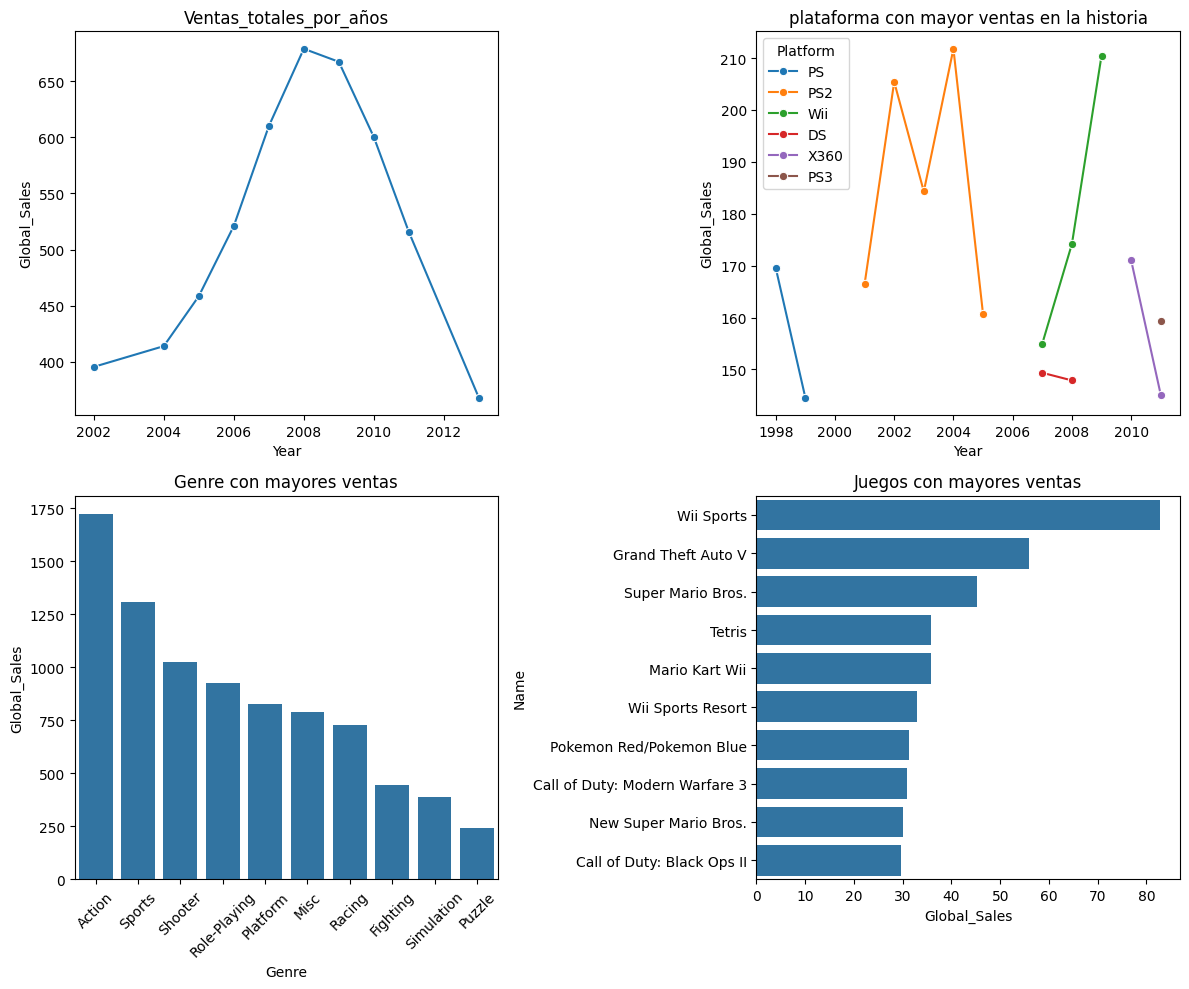

In [53]:
#crear graficos 
fig, axes = plt.subplots(2,2, figsize=(12, 10))

sns.lineplot(data=total_sales, x="Year", y="Global_Sales", marker="o", ax=axes[0, 0])
axes[0, 0].set_title("Ventas_totales_por_años")

sns.lineplot(data=sales_plat, x="Year", y="Global_Sales", hue="Platform", marker="o", ax=axes[0, 1])
axes[0, 1].set_title("plataforma con mayor ventas en la historia")

sns.barplot(data=gen, x="Genre", y="Global_Sales", ax=axes[1, 0])
axes[1, 0].set_title("Genre con mayores ventas")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

sns.barplot(data=juegos, y="Name", x="Global_Sales", ax=axes[1, 1])
axes[1, 1].set_title("Juegos con mayores ventas")

plt.tight_layout()
plt.show()

In [62]:
#¿Hay genre que se venden mejor en ciertas regiones (NA, EU, JP)?
region = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index()
region

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,861.77,516.48,158.65
1,Adventure,101.93,63.74,51.99
2,Fighting,220.74,100.00,87.15
3,Misc,396.92,211.77,106.67
4,Platform,445.99,200.65,130.65
5,Puzzle,122.01,50.52,56.68
6,Racing,356.93,236.31,56.61
7,Role-Playing,326.50,187.57,350.29
8,Shooter,575.16,310.45,38.18
9,Simulation,181.78,113.02,63.54
